<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Master/Fault_Detect_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from tensorflow.keras.utils import plot_model
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [ ]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.7)]
Train_Y = Data_Y[:int(len(Data_Y)*0.7)]
Vald_X = Data_X[int(len(Data_X)*0.7):int(len(Data_X)*0.85)]
Vald_Y = Data_Y[int(len(Data_Y)*0.7):int(len(Data_Y)*0.85)]
Test_X = Data_X[int(len(Data_X)*0.85):]
Test_Y = Data_Y[int(len(Data_Y)*0.85):]

numpy.save("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X.npy", Train_X)
numpy.save("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y.npy", Train_Y)
numpy.save("/content/drive/My Drive/Colab_Data/Fault_Detect/Vald_X.npy", Vald_X)
numpy.save("/content/drive/My Drive/Colab_Data/Fault_Detect/Vald_Y.npy", Vald_Y)
numpy.save("/content/drive/My Drive/Colab_Data/Fault_Detect/Test_X.npy",Test_X)
numpy.save("/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Y.npy", Test_Y)
 
print("The shape of the Input:", Data_X.shape)
print("The shape of the Training X:",Train_X.shape)
print("The shape of the Validate X:",Vald_X.shape)
print("The shape of the Testing X:",Test_X.shape)
print ("")
print("The shape of the Output:",Data_Y.shape)
print("The shape of the Training Y:",Train_Y.shape)
print("The shape of the Validate Y:",Vald_Y.shape)
print("The shape of the Testing Y:",Test_Y.shape)

#print(Data_X.shape)
#print(Data_Y.shape)
#print(Data_X[:10])
#print(Data_Y[:10].astype('int'))

The shape of the Input: (22950, 5, 5000, 1)
The shape of the Training X: (16064, 5, 5000, 1)
The shape of the Validate X: (3443, 5, 5000, 1)
The shape of the Testing X: (3443, 5, 5000, 1)

The shape of the Output: (22950, 9)
The shape of the Training Y: (16064, 9)
The shape of the Validate Y: (3443, 9)
The shape of the Testing Y: (3443, 9)


In [ ]:
#del(Data_X)
#del(Data_Y)
#del(Train_X)
#del(Train_Y)
#del(Vald_X)
#del(Vald_Y)
del(Test_X)
del(Test_Y)

In [ ]:
del(history)
del(inputs)
del(model)
del(outputs)
del(x)

<h2>The main network </h2>

1. one Conv Layer with filter 50 , Kerna size (2, 5), strides (1, 2), activation = relu
2. BatchNormalization 
3. MaxPooling2D (pool_size (1, 100)
4. Output activation =  softmax  
5. optimizer= adam, loss= CategoricalCrossentropy
Result 94% with epoch 50 , batch size = 120,

<br>Training    ['loss', 'accuracy']  =  [0.1254553496837616, 0.9498257040977478]</br>
</br>Testing     ['loss', 'accuracy']  =  [0.14555826783180237, 0.9456868767738342]</br>

<h2> 1st trial </h3>

1. one Conv Layer with filter 50, Kernal size (1, 5), strides (1, 2), activation = relu


<br>Training    ['loss', 'accuracy']  =  [0.12389756739139557, 0.9426046013832092]</br>
<br>Testing     ['loss', 'accuracy']  =  [0.12888164818286896, 0.9430729150772095]</br>

<h2>2nd trial</h2>
1. one NN Layer with output 64 , activation = relu

<br>Training    ['loss', 'accuracy']  =  [0.06926220655441284, 0.9693725109100342]</br>
<br>Testing     ['loss', 'accuracy']  =  [0.0782979354262352, 0.9642753601074219]</br>

<h2>3rd trial</h2> 

1. 2nd trial
2. one NN Layer with output 32, activation = relu

<br>Training    ['loss', 'accuracy']  =  [0.09163324534893036, 0.9482071995735168]</br>
<br>Testing     ['loss', 'accuracy']  =  [0.09710441529750824, 0.9433633685112]</br>

<h2>4th trial</h2>

1. 2nd trial
2. one Conv Layer with filter 21, Kernal size (2, 20), pading = same, activation = relu

<br>Training    ['loss', 'accuracy']  =  [0.077150858938694, 0.9503237009048462]</br>
<br>Testing     ['loss', 'accuracy']  =  [0.09069331735372543, 0.9424920082092285]</br>

In [3]:
Train_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X.npy")
Train_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y.npy")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 5, 5000, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 4, 2498, 50)       550       
                                                                 
 batch_normalization (BatchN  (None, 4, 2498, 50)      200       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 99, 50)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 19800)             0         
                                                                 
 dense (Dense)               (None, 128)               253452

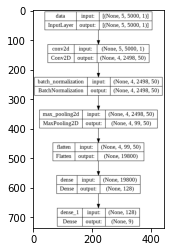

In [4]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
x = layers.Conv2D(filters = 50, kernel_size = (2, 5),strides=(1, 2), activation = "relu") (inputs)
#x = layers.Conv2D(filters = 50, kernel_size = (1, 5),strides=(1, 2), activation = "relu") (x)                 # first Trial 13/12/2022
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size = (1,25)) (x)

x = layers.Flatten()(x) 
x = layers.Dense(128, activation="relu")(x) 

outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
model = keras.Model(inputs, outputs, name="model") 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [5]:
Vald_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Vald_X.npy")
Vald_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Vald_Y.npy")

In [ ]:
history = model.fit(Train_X, Train_Y, epochs=400,batch_size = 125, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/400
129/129 - 18s - loss: 0.8480 - accuracy: 0.7455 - val_loss: 1.3123 - val_accuracy: 0.6898 - 18s/epoch - 143ms/step
Epoch 2/400
129/129 - 6s - loss: 0.3381 - accuracy: 0.8301 - val_loss: 1.0150 - val_accuracy: 0.6108 - 6s/epoch - 46ms/step
Epoch 3/400
129/129 - 6s - loss: 0.3011 - accuracy: 0.8500 - val_loss: 0.5745 - val_accuracy: 0.8551 - 6s/epoch - 44ms/step
Epoch 4/400
129/129 - 6s - loss: 0.2529 - accuracy: 0.8766 - val_loss: 0.3146 - val_accuracy: 0.8693 - 6s/epoch - 44ms/step
Epoch 5/400
129/129 - 6s - loss: 0.2352 - accuracy: 0.8866 - val_loss: 0.2810 - val_accuracy: 0.8516 - 6s/epoch - 45ms/step
Epoch 6/400
129/129 - 6s - loss: 0.2180 - accuracy: 0.8907 - val_loss: 0.2037 - val_accuracy: 0.9097 - 6s/epoch - 45ms/step
Epoch 7/400
129/129 - 6s - loss: 0.2254 - accuracy: 0.8899 - val_loss: 0.3096 - val_accuracy: 0.8638 - 6s/epoch - 45ms/step
Epoch 8/400
129/129 - 6s - loss: 0.2009 - accuracy: 0.9036 - val_loss: 0.2058 - val_accuracy: 0.9044 - 6s/epoch - 45ms/step
Epoch

In [ ]:
model.save('/content/drive/My Drive/Colab_Data/Fault_Detect/my_model2022_epoch400.h5')

In [ ]:
del(Vald_X)
del(Vald_Y)

In [ ]:
Test_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Test_X.npy")
Test_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Y.npy")

In [ ]:
from numpy import argmax
from numpy import random
print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X,  Vald_Y, verbose=0))
print ('Testing    ', model.metrics_names,' = ',model.evaluate(Test_X,  Test_Y, verbose=0))

print ('true (Test)     \n',argmax(Test_Y,axis=1))
print ('predicted (Test)\n',argmax(model.predict(Test_X), axis=1))

print ('true (Train)     \n',argmax(Train_Y[:10],axis=1))    
print ('predicted (Train)\n', argmax(model.predict(Train_X[:10]), axis=1))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
#print (model.summary())

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
del(history)
del(inputs)
del(model)
del(outputs)
del(x)
